# Sub-Gradient Methods and Non-Convex Optimization

## Introduction : 

#### Subgradient methods are used to optimize non-differentiable functions, often convex, but also sometimes non-convex. Unlike conventional gradient methods, they can handle functions with angular points or derivative discontinuities.

In [3]:
from IPython.display import display
from PIL import Image

#### Subgradient definition

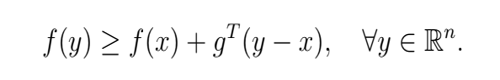

In [4]:
display((Image.open("sous_gradient.png").convert("RGB")).resize((500, 80)))

#### We will explore the resolution of the Subgradient Descent, through this TP, having as objective function: 

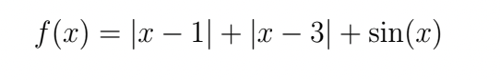

In [5]:
display((Image.open("fonction_objective.png").convert("RGB")).resize((500, 80)))

In [6]:
import numpy as np
import matplotlib . pyplot as plt

def f ( x ) : 
    return np.abs( x - 1) + np .abs( x - 3) + np . sin (x )

# For our function, the subgradient is quite simple to model:
def subgradient ( x ) :
    # Sub - gradient for |x -1|
    if x > 1:
        g1 = 1
    elif x < 1:
        g1 = -1
    else : # x == 1 , arbitrary choice in [ -1 , 1]
        g1 = 0 # Conventional choice
    # Sub - gradient for |x -3|
    if x > 3:
        g2 = 1
    elif x < 3:
        g2 = -1
    else : # x == 3
        g2 = 0 # Choice in [ -1 , 1]
    # Gradient for sin(x)
    g3 = np.cos(x)
    return g1 + g2 + g3

In [7]:
def subgradient_descent ( x0 , step_size , max_iter , tol=1e-6) :
    x = x0
    history = [ x ]
    for k in range ( max_iter ) :
        g = subgradient ( x )
        x_new = x - step_size ( k ) * g
        
        if np.abs(x_new- x) < tol :
            break
        x = x_new
        history . append ( x )
    return x , history

### Initialization of our Subgradient descent

 Minimum trouvé =1.0043 , f(x) = 2.8438


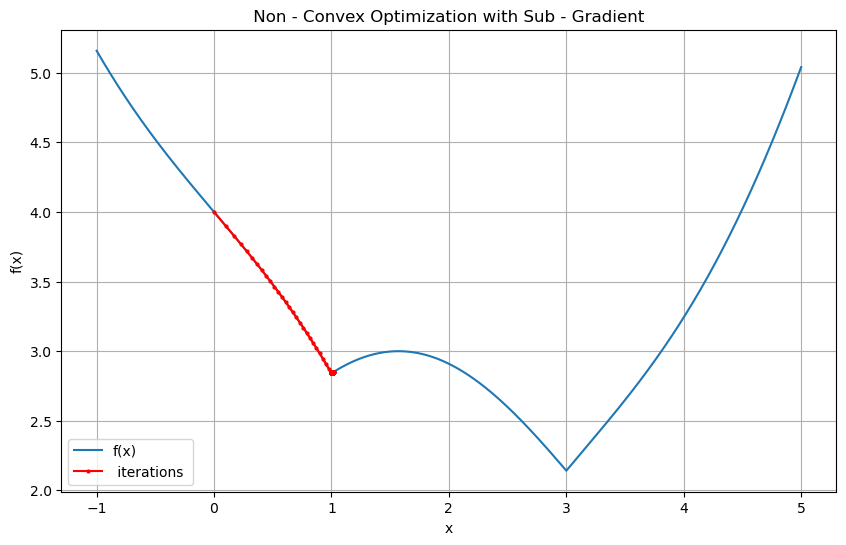

In [8]:
x0 = 0.0 # start with a random point 
max_iter = 1000
step_size = lambda k : 0.1 / ( k + 1) **0.51 # for slower decay than 1/k, allowing more in-depth exploration

x_opt , history = subgradient_descent ( x0 , step_size , max_iter )
print ( f" Minimum trouvé ={ x_opt :.4f} , f(x) = {f( x_opt ):.4f}")

# Visualization
x_vals = np . linspace ( -1 , 5 , 400)
plt . figure ( figsize =(10 ,6) )
plt . plot ( x_vals , [ f ( x ) for x in x_vals ] , label ="f(x)")
plt . plot ( history , [ f ( x ) for x in history ] , "ro-", markersize
=2 , label =" iterations ")
plt . xlabel ("x")
plt . ylabel ("f(x)")
plt . title (" Non - Convex Optimization with Sub - Gradient ")
plt . legend ()
plt . grid ( True )
plt . show ()

### We observe that we do reach an extremum, but it's a local minimum, so in principle gradient descent works, but it's not robust enough to handle the non-cobvexity of our objective function.

### We therefore initialize a Stochastic Gradient Descent by taking into account a defined work frame.

In [9]:
def stochastique_subgradient_descent(step_size , max_iter , frame, tol=1e-6 ) :
    
    x = np.random.uniform(frame[0], frame[-1])
    history = [ x ]
    for k in range ( max_iter ) :
        g = subgradient ( x )
        x_new = x - step_size ( k ) * g
        
        if np.abs(x_new- x) < tol :
            break
        x = x_new
        history . append ( x )
    return x , history

 Minimum trouvé =0.9984 , f(x) = 2.8438


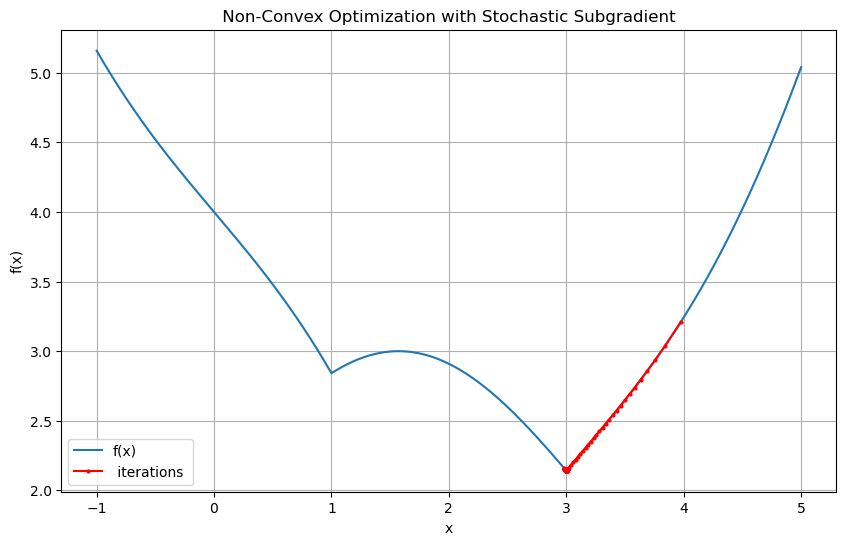

In [12]:
intervalle_exploration=[[-2, 0], [0, 2], [2,5]] # we define frames according to the appearance of our curve 
otpimum=[]
step_size = lambda k : 0.1 / ( k + 1) **0.51 


for i in range(len(intervalle_exploration)) : # we'll test each frame we create 
    local_optimum , local_history = stochastique_subgradient_descent (step_size , 1000, intervalle_exploration[i] )
    otpimum.append(local_optimum) # we're going to store the local minimums in chaue frame

true_optimum=np.min(otpimum) # we keep only the best local minimum, which will therefore be a global minimum

frame_index=intervalle_exploration[np.argmin(otpimum)]
_ , history = stochastique_subgradient_descent (step_size , 1000, intervalle_exploration[i] )


print ( f" Minimum trouvé ={ true_optimum :.4f} , f(x) = {f( true_optimum ):.4f}")

# Visualization
x_vals = np . linspace ( -1 , 5 , 400)
plt . figure ( figsize =(10 ,6) )
plt . plot ( x_vals , [ f ( x ) for x in x_vals ] , label ="f(x)")
plt . plot ( history , [ f ( x ) for x in history ] , "ro-", markersize=2 , label =" iterations ")
plt . xlabel ("x")
plt . ylabel ("f(x)")
plt . title (" Non-Convex Optimization with Stochastic Subgradient ")
plt . legend ()
plt . grid ( True )
plt . show ()

## Conclusion:

### We have optimized the non-convex function f(x)=∣x-1∣+∣x-3∣+sin(x) using subgradient descent. The choice of a slowly decreasing step allowed fine-grained exploration of the function's landscape, despite the non-convexity.

### To avoid local minima, we implemented stochastic descent with exploration of several intervals. This method identified an approximate global minimum by comparing several local solutions.

### In summary, subgradient is well suited to non-convex functions, provided that the step size is well managed and different starting points are explored.